<a href="https://colab.research.google.com/github/pradogps/google-colab-notebooks/blob/master/Projeto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto 1 - Introdução à Ciência de Dados**
Gustavo Prado N°USP: 11381751, prado.gustavo@usp.br.

Universidade de São Paulo, São Carlos, Brasil.

21 de Setembro de 2020

---

## **Exercício 1**
Leia os dados com erro novamente, faça a limpeza e remova as duas
últimas colunas.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving iris-with-errors.csv to iris-with-errors (1).csv


In [ ]:
import random
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import io

In [ ]:
random.seed(1)
data = pd.read_csv(io.BytesIO(uploaded["iris-with-errors.csv"]))
# Dataset is now stored in a Pandas Dataframe
data = data.replace('?', np.nan)
data = data.dropna()
data = data.drop_duplicates()

print("Atributos atuais:",data.columns)
print("Colunas removidas:", data.columns[[3, 4]])
# Remove as linhas especificadas
data = data.drop(data.columns[[3, 4]], axis=1)
data.head(25)

Atributos atuais: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
Colunas removidas: Index(['petal_width', 'species'], dtype='object')


,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
3,4.7,3.2,1.3
6,5,3.6,1.4
7,5.4,3.9,1.7
10,5,3.4,1.5
11,4.4,2.9,1.4
12,4.9,3.1,1.5
13,5.4,3.7,1.5
15,4.8,3.4,1.6
16,4.8,3,1.4


---

## **Exercício 2**
Leia os dados com erro novamente e insira a mediana de cada atributo
onde for encontrada NaN.

In [ ]:
random.seed(1)
data = pd.read_csv(io.BytesIO(uploaded["iris-with-errors.csv"]))
data = data.replace('?', np.nan)

# convertemos para o formato Numpy e ignoramos a última coluna (classe)
X = np.array(data[data.columns[0:data.shape[1]-1]], dtype = float)
print(f"{X}\n") 
# calculamos a mediana de cada atributo e armazenamos em um vetor
# Usamos a função nanmedian que calcula a mediana ignorando os Nan
averages = np.nanmedian(X, axis = 0)
for i in np.arange(0, X.shape[0]):
    for j in np.arange(0, X.shape[1]):
        if(np.isnan(X[i,j]) == True): # verificar se é uma entrada com Nan
            X[i,j] = averages[j] # insere a mediana
print(X)

[[5.1 3.5 1.4 0.2]
 [5.1 3.5 1.4 0.2]
 [nan 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [5.1 3.5 1.4 0.2]
 [nan 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 nan]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.4 2.9 1.4 0.2]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 nan]
 [5.1 3.5 1.4 0.3]
 [5.7 nan 1.7 0.3]
 [nan 3.8 1.5 0.3]]

[[5.1  3.5  1.4  0.2 ]
 [5.1  3.5  1.4  0.2 ]
 [5.05 3.   1.4  0.2 ]
 [4.7  3.2  1.3  0.2 ]
 [5.1  3.5  1.4  0.2 ]
 [5.05 3.1  1.5  0.2 ]
 [5.   3.6  1.4  0.2 ]
 [5.4  3.9  1.7  0.4 ]
 [5.4  3.9  1.7  0.4 ]
 [4.6  3.4  1.4  0.2 ]
 [5.   3.4  1.5  0.2 ]
 [4.4  2.9  1.4  0.2 ]
 [4.9  3.1  1.5  0.1 ]
 [5.4  3.7  1.5  0.2 ]
 [4.4  2.9  1.4  0.2 ]
 [4.8  3.4  1.6  0.2 ]
 [4.8  3.   1.4  0.1 ]
 [4.4  2.9  1.4  0.2 ]
 [4.3  3.   1.1  0.1 ]
 [5.8  4.   1.2  0.2 ]
 [5.7  4.4  1.5  0.4 ]
 [5.4  3.9  1.3  0.2 ]
 [5.1  3.5  1.4  

----

## **Exercício 3**
Conside os dados da Iris e mostre a distribuição de probabilidades de cada
uma das variáveis após a normalização e padronização.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris (6).csv


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded["iris.csv"]))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# considera somente os atributos, ignorando a última coluna, que contem a classe
X = np.array(data[data.columns[0:data.shape[1]-1]])
for i  in range(X.shape[1]):
    print(f"Maior valor da coluna: {i}: {max(X[:,i])}")
    print(f"Menor valor da coluna: {i}: {min(X[:,i])}")
# prepara a função para transformar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
# Realiza a normalização e coloca em um novo vetor
X_norm = scaler.fit_transform(X)
print(X_norm)

Maior valor da coluna: 0: 7.9
Menor valor da coluna: 0: 4.3
Maior valor da coluna: 1: 4.4
Menor valor da coluna: 1: 2.0
Maior valor da coluna: 2: 6.9
Menor valor da coluna: 2: 1.0
Maior valor da coluna: 3: 2.5
Menor valor da coluna: 3: 0.1
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.3055

In [ ]:
from sklearn.preprocessing import StandardScaler
X = np.array(data[data.columns[0:data.shape[1]-1]])
# prepara a função para transformar os dados
scaler = StandardScaler().fit(X)
# realiza a padronização (média=0, variância = 1)
rescaledX = scaler.transform(X)
print(rescaledX)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

In [ ]:
data2 = pd.DataFrame(X_norm)
print(data2)
data3 = pd.DataFrame(rescaledX)
print(data3)

            0         1         2         3
0    0.222222  0.625000  0.067797  0.041667
1    0.166667  0.416667  0.067797  0.041667
2    0.111111  0.500000  0.050847  0.041667
3    0.083333  0.458333  0.084746  0.041667
4    0.194444  0.666667  0.067797  0.041667
..        ...       ...       ...       ...
145  0.666667  0.416667  0.711864  0.916667
146  0.555556  0.208333  0.677966  0.750000
147  0.611111  0.416667  0.711864  0.791667
148  0.527778  0.583333  0.745763  0.916667
149  0.444444  0.416667  0.694915  0.708333

[150 rows x 4 columns]
            0         1         2         3
0   -0.900681  1.032057 -1.341272 -1.312977
1   -1.143017 -0.124958 -1.341272 -1.312977
2   -1.385353  0.337848 -1.398138 -1.312977
3   -1.506521  0.106445 -1.284407 -1.312977
4   -1.021849  1.263460 -1.341272 -1.312977
..        ...       ...       ...       ...
145  1.038005 -0.124958  0.819624  1.447956
146  0.553333 -1.281972  0.705893  0.922064
147  0.795669 -0.124958  0.819624  1.053537
148  0.4

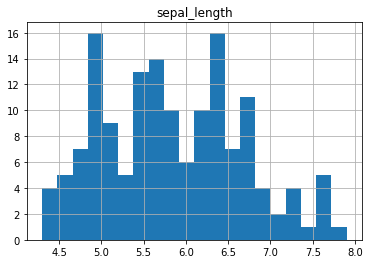

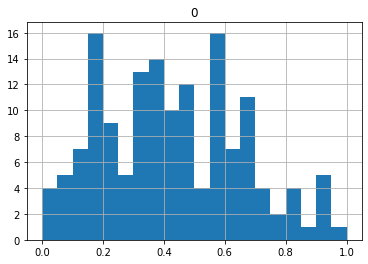

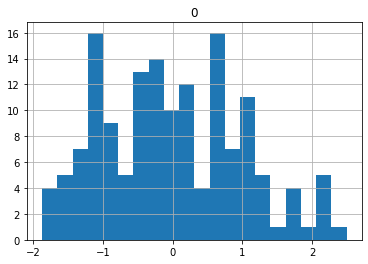

In [ ]:
data.hist(column=data.columns[0], bins=20)
data2.hist(column=data2.columns[0], bins=20)
data3.hist(column=data3.columns[0], bins=20)
plt.show()

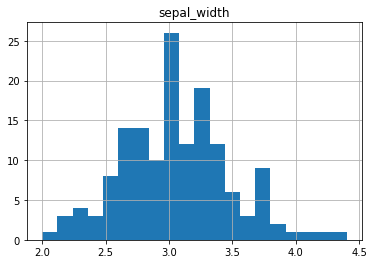

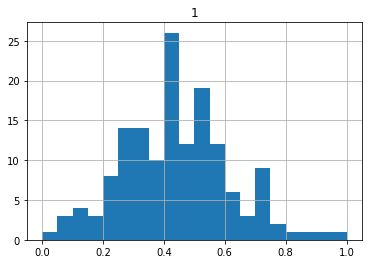

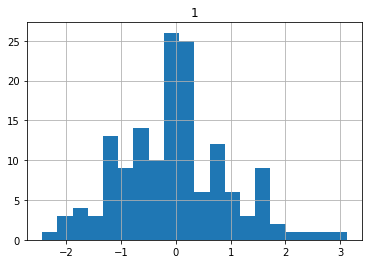

In [ ]:
data.hist(column=data.columns[1], bins=20)
data2.hist(column=data2.columns[1], bins=20)
data3.hist(column=data3.columns[1], bins=20)
plt.show()

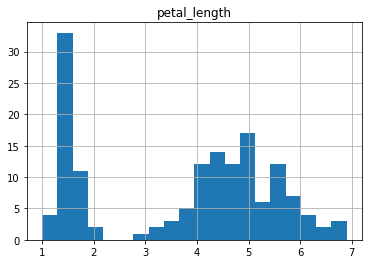

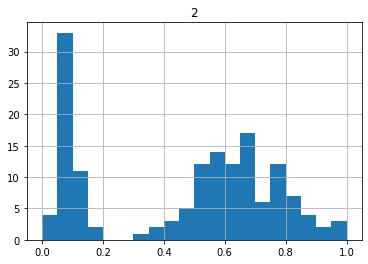

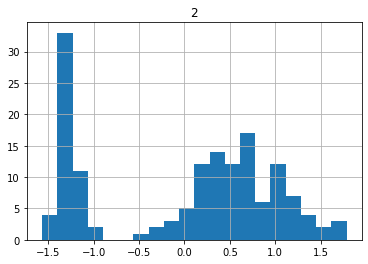

In [ ]:
data.hist(column=data.columns[2], bins=20)
data2.hist(column=data2.columns[2], bins=20)
data3.hist(column=data3.columns[2], bins=20)
plt.show()

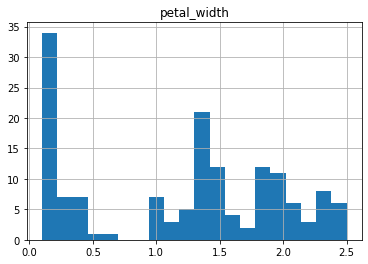

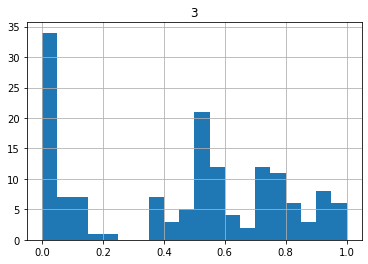

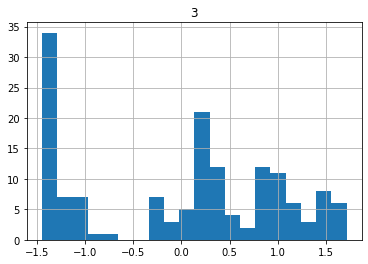

In [ ]:
data.hist(column=data.columns[3], bins=20)
data2.hist(column=data2.columns[3], bins=20)
data3.hist(column=data3.columns[3], bins=20)
plt.show()

## **Exercício 4**
Amostre os dados da Iris e selecione 10 elementos em cada classe.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris (4).csv


[50. 50. 50.]


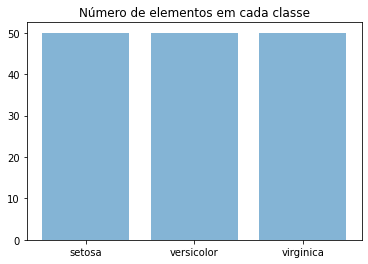

In [ ]:
random.seed(1)
data = pd.read_csv(io.BytesIO(uploaded["iris.csv"]))
classes = data[data.columns[-1]]
# armazena os nomes das classes
cl = np.unique(classes)
# armazena o número de elementos em cada classe
ncl = np.zeros(len(cl))
for i in np.arange(0, len(cl)):
    a = classes == cl[i]
    ncl[i] = len(classes[a])
print(ncl)
# número de classes
numbers = np.arange(0, len(cl))
plt.bar(numbers, ncl,  alpha=.55)
# mostra o nome das classes ao invés dos números
plt.xticks(numbers, cl)
plt.title('Número de elementos em cada classe')
plt.show(True)

In [ ]:
N = 10
# classes
cl = np.unique(classes)
X = np.array(data)
Xnew = []
cls = np.array(data[data.columns[-1]])
for i in np.arange(0, len(cl)):
    a = np.argwhere(cls == cl[i])
    # seleciona os índices nos dados de forma aleatória
    inds = np.random.choice(a[:,0],N,replace=False)
    Xnew.append(X[inds,:])
Xnew = np.array(Xnew)
print('Dados obtidos a partir da amostragem')
print(Xnew)

Dados obtidos a partir da amostragem
[[[5.0 3.5 1.6 0.6 'setosa']
  [4.9 3.1 1.5 0.1 'setosa']
  [5.1 3.8 1.9 0.4 'setosa']
  [5.0 3.5 1.3 0.3 'setosa']
  [5.1 3.8 1.6 0.2 'setosa']
  [4.4 3.0 1.3 0.2 'setosa']
  [4.6 3.4 1.4 0.3 'setosa']
  [4.5 2.3 1.3 0.3 'setosa']
  [4.7 3.2 1.3 0.2 'setosa']
  [5.5 3.5 1.3 0.2 'setosa']]

 [[6.1 3.0 4.6 1.4 'versicolor']
  [5.7 2.8 4.5 1.3 'versicolor']
  [6.3 3.3 4.7 1.6 'versicolor']
  [5.6 3.0 4.1 1.3 'versicolor']
  [6.4 3.2 4.5 1.5 'versicolor']
  [5.8 2.7 3.9 1.2 'versicolor']
  [6.1 2.8 4.0 1.3 'versicolor']
  [5.5 2.4 3.8 1.1 'versicolor']
  [6.7 3.1 4.4 1.4 'versicolor']
  [6.3 2.5 4.9 1.5 'versicolor']]

 [[7.2 3.6 6.1 2.5 'virginica']
  [6.4 2.8 5.6 2.1 'virginica']
  [7.7 2.8 6.7 2.0 'virginica']
  [5.6 2.8 4.9 2.0 'virginica']
  [6.3 2.7 4.9 1.8 'virginica']
  [5.7 2.5 5.0 2.0 'virginica']
  [6.9 3.1 5.1 2.3 'virginica']
  [6.7 3.0 5.2 2.3 'virginica']
  [7.7 2.6 6.9 2.3 'virginica']
  [6.7 3.3 5.7 2.5 'virginica']]]


----

## **Exercício 5**
Monte um boxplot para cada variável dos dados da Iris.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris (3).csv


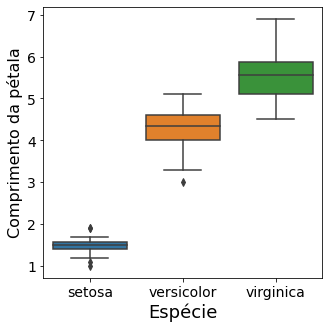

In [ ]:
random.seed(1)
data = pd.read_csv(io.BytesIO(uploaded["iris.csv"]))
plt.figure(figsize=(5, 5))
sns.boxplot(x="species", y="petal_length", data=data)
plt.xlabel('Espécie', fontsize=18)
plt.ylabel('Comprimento da pétala', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(True)

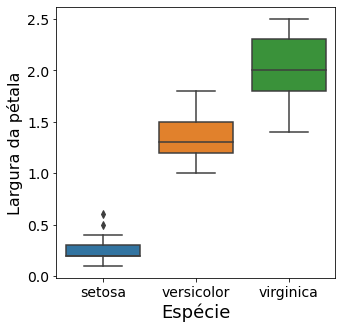

In [ ]:
plt.figure(figsize=(5, 5))
sns.boxplot(x="species", y="petal_width", data=data)
plt.xlabel('Espécie', fontsize=18)
plt.ylabel('Largura da pétala', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(True)

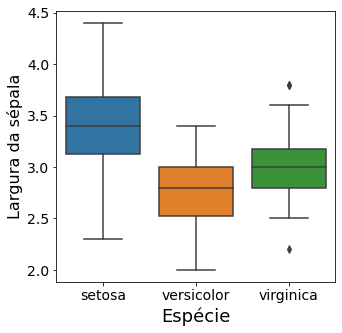

In [ ]:
plt.figure(figsize=(5, 5))
sns.boxplot(x="species", y="sepal_width", data=data)
plt.xlabel('Espécie', fontsize=18)
plt.ylabel('Largura da sépala', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(True)

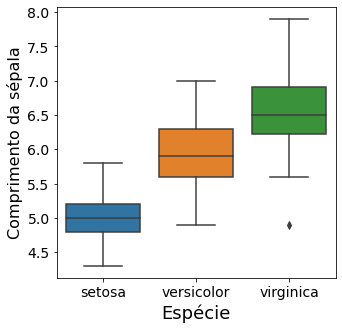

In [ ]:
plt.figure(figsize=(5, 5))
sns.boxplot(x="species", y="sepal_length", data=data)
plt.xlabel('Espécie', fontsize=18)
plt.ylabel('Comprimento da sépala', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(True)

---

## **Exercício 6**
Encontre os outliers nos dados das bases Iris e BostonHouse.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris (5).csv


In [ ]:
random.seed(1)
data = pd.read_csv(io.BytesIO(uploaded["iris.csv"]))
x = data.shape[0]
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
v = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
data = data.drop(data.index[list(v)], axis=0)
y = data.shape[0]
print(f"Outliers: {x - y}")

Outliers: 4


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BostonHousing.csv to BostonHousing.csv


In [ ]:
random.seed(1)
data = pd.read_csv(io.BytesIO(uploaded["BostonHousing.csv"]))
x = data.shape[0]
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
v = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
data = data.drop(data.index[list(v)], axis=0)
y = data.shape[0]
print(f"Outliers: {x - y}")

Outliers: 238
